In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
THIS_DIR = os.path.abspath('')

In [44]:
df = pd.read_excel(os.path.join(THIS_DIR ,"top_exported_data.xlsx"),
                   sheet_name=3)

df

,Water Content [Vol%],log 10 K [cm/d]
0,55.28,-2.01
1,54.98,-0.79
2,54.65,-0.94
3,54.33,-0.98
4,54.00,-1.19
...,...,...
122,38.83,-3.47
123,38.47,-3.52
124,38.11,-3.58
125,37.72,-3.59


In [45]:
df['K'] = 10**(df['log 10 K [cm/d]'])/100.0/86400

In [46]:
df['K']

0      1.131062e-09
1      1.877095e-08
2      1.328882e-08
3      1.211954e-08
4      7.472850e-09
           ...     
122    3.921807e-11
123    3.495314e-11
124    3.044292e-11
125    2.974995e-11
126    2.651467e-12
Name: K, Length: 127, dtype: float64

df['K']

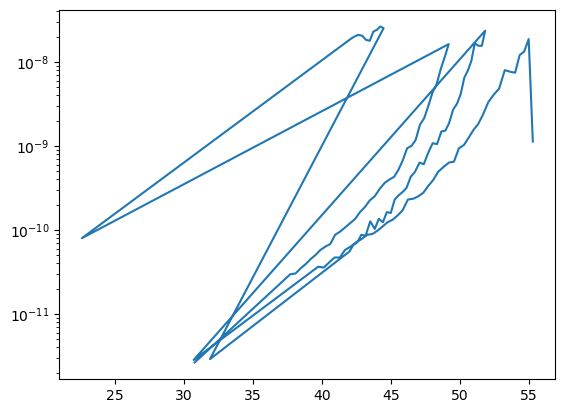

In [47]:
plt.plot(df['Water Content [Vol%]'], df['K'])
plt.yscale('log')

In [48]:
def K_QUINCY(theta):
    theta_s = 45.4
    
    sax_c = 17.8
    
    KSat = 4.6 * 10 ** (-7)
    if theta/theta_s > 1:
        return KSat
    else:
        return KSat* (theta/theta_s) ** sax_c
    
    (theta/theta_s)

In [50]:
df["K_Q"] = [K_QUINCY(x) for x in df['Water Content [Vol%]']]

(1e-20, 1e-05)

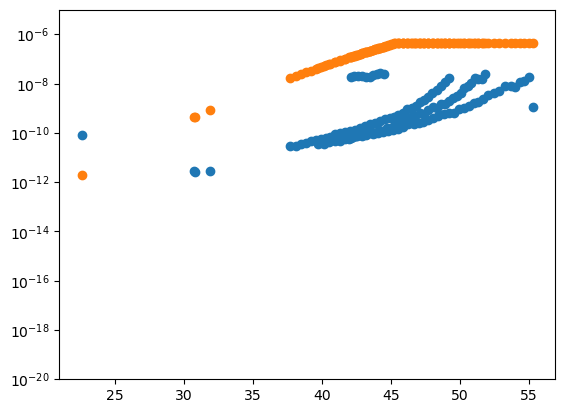

In [53]:
plt.scatter(df['Water Content [Vol%]'], df['K'])
plt.scatter(df['Water Content [Vol%]'], df['K_Q'])
plt.yscale('log')
plt.ylim(10**-20, 10**-5)